# ML Lab-2

## Handling Missing Values

In [168]:
# Config for google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
df = pd.read_csv("/content/drive/MyDrive/Ml-LabData/Lab-2/Exercise-CarData.csv")
df.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [171]:
df.describe()

,Unnamed: 0,Price,Age,MetColor,Automatic,CC,Weight
count,1436.000000,1436.000000,1336.000000,1286.000000,1436.000000,1436.000000,1436.00000
mean,717.500000,10730.824513,55.672156,0.674961,0.055710,1566.827994,1072.45961
std,414.681806,3626.964585,18.589804,0.468572,0.229441,187.182436,52.64112
min,0.000000,4350.000000,1.000000,0.000000,0.000000,1300.000000,1000.00000
25%,358.750000,8450.000000,43.000000,0.000000,0.000000,1400.000000,1040.00000
50%,717.500000,9900.000000,60.000000,1.000000,0.000000,1600.000000,1070.00000
75%,1076.250000,11950.000000,70.000000,1.000000,0.000000,1600.000000,1085.00000
max,1435.000000,32500.000000,80.000000,1.000000,1.000000,2000.000000,1615.00000


In [172]:
# print(df["FuelType"].unique())
# print(df[""])
for col in df.columns:
  print(col," => ",df[col].unique())

Unnamed: 0  =>  [   0    1    2 ... 1433 1434 1435]
Price  =>  [13500 13750 13950 14950 12950 16900 18600 21500 20950 19950 19600 22500
 22000 22750 17950 16750 16950 15950 16250 17495 15750 15500 14750 19000
 15800 21950 20500 13250 15250 18950 15999 16500 18750 22250 12995 18450
 16895 14900 17250 15450 16650 17450 16450 18900 18990 18500 19450 18800
 32500 31000 31275 24950 22950 24990 17900 19250 16350 21750 15850 23000
 19900 23950 24500 17200 19500 16868 19750 20750 17650 17795 18245 23750
 18700 21125  6950  9500 11950  7750  4350  4750 11750 11900  9950 11495
 11250 10500 10450 11500 12500 10950 11450 11790 12450 11690 12750 11925
 12900 11650 10850  9940 13450 12495 12000 11480 14990 12850 11700 11895
 13875 12295 13995  9900 11990 10750 11695 11000 12400 12200 12695 14350
 10250  6500  6400  7000  8900  8500  8950  9250  9450  8250  4450  9000
  5150  7900 10900  9750 11290 10895 10995  9850  8695 10990  8750  9930
  9799  9700  9990  9475 10000 10495  9400  9650  9550 13000 

In [173]:
# From above we can see that fuel type,HP,metcolor have Nan types and Doors have 
# 'three','five' kind of data

In [174]:
# in km we have a ?? value
# in FuelType we have nan
# in HP we have ????
# in Doors we have 'three' 'five' ... etc
# in metcolor we have nan
# Age also has nan we can replace it with mean
# Rest all columns are OK

In [175]:
# Step-1 Cleaning KM column
df["KM"].replace('??',-1,inplace=True)

In [176]:
df["KM"] = df["KM"].astype(int)

In [177]:
df["KM"].replace(-1,np.nan,inplace=True)

In [178]:
df["KM"].fillna(int(df["KM"].mean(skipna=True)),inplace = True)

In [179]:
df["KM"]

0       46986.0
1       72937.0
2       41711.0
3       48000.0
4       38500.0
         ...   
1431    20544.0
1432    68647.0
1433    17016.0
1434    68647.0
1435        1.0
Name: KM, Length: 1436, dtype: float64

In [180]:

# Step - 2 Cleaning FuelType and generating one hot representations for the same
df["FuelType"].unique()

array(['Diesel', nan, 'Petrol', 'CNG'], dtype=object)

In [181]:
df["FuelType"].value_counts()

Petrol    1177
Diesel     144
CNG         15
Name: FuelType, dtype: int64

In [182]:
# As we can infer there are maximum petrol cars we replace all nan cars to petrol cars

In [183]:
df["FuelType"].fillna('Petrol',inplace=True)

In [184]:
df["FuelType"].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [185]:
df["FuelType"].value_counts()

Petrol    1277
Diesel     144
CNG         15
Name: FuelType, dtype: int64

In [186]:
fuelDummies = pd.get_dummies(df["FuelType"])

In [187]:
# Now we drop the fuel type and concat fuelDummies

In [188]:
df.drop(["FuelType"],axis=1,inplace = True)

In [189]:
df.head()

,Unnamed: 0,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986.0,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937.0,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711.0,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000.0,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500.0,90,0.0,0,2000,3,1170


In [190]:
df = pd.concat([df,fuelDummies],axis=1)
df.head()

,Unnamed: 0,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,CNG,Diesel,Petrol
0,0,13500,23.0,46986.0,90,1.0,0,2000,three,1165,0,1,0
1,1,13750,23.0,72937.0,90,1.0,0,2000,3,1165,0,1,0
2,2,13950,24.0,41711.0,90,NaN,0,2000,3,1165,0,1,0
3,3,14950,26.0,48000.0,90,0.0,0,2000,3,1165,0,1,0
4,4,13750,30.0,38500.0,90,0.0,0,2000,3,1170,0,1,0


In [191]:

# Step-3 Removing ???? in HP and replacing with mean
df["HP"].replace('????',-1,inplace=True)
df["HP"] = df["HP"].astype(int)
df["HP"].replace(-1,np.nan,inplace=True)
df["HP"].fillna(int(df["HP"].mean(skipna=True)),inplace = True)
df["HP"].unique() # Now we can see all nan are replaced with mean

array([ 90., 101., 192., 110.,  97.,  71., 116.,  98.,  69.,  86.,  72.,
       107.,  73.])

In [192]:

# Step-4 Door data in df
doorMapping = {'three':'3','four':'4','five':'5'}
df["Doors"].replace(doorMapping,inplace=True)

In [193]:
df["Doors"].value_counts()

5    674
3    622
4    138
2      2
Name: Doors, dtype: int64

In [194]:
df["Doors"] = df["Doors"].astype(int)

In [195]:
df["Doors"].unique()

array([3, 5, 4, 2])

In [196]:

# Step-5 Cleaning nan from met color column

In [197]:
df["MetColor"].value_counts()

1.0    868
0.0    418
Name: MetColor, dtype: int64

In [198]:
df["MetColor"].unique()

array([ 1., nan,  0.])

In [199]:
# Replacing nan with 1 as 1 is in majority
df["MetColor"].fillna(1.0,inplace=True)

In [200]:
df["MetColor"].unique()

array([1., 0.])

In [201]:
df["MetColor"].value_counts()

1.0    1018
0.0     418
Name: MetColor, dtype: int64

In [202]:
# Step-6 Cleaning age and replacing with mean
df["Age"].fillna(-1,inplace=True)
df["Age"] = df["Age"].astype(int)
df["Age"].replace(-1,np.nan,inplace=True)
df["Age"].fillna(int(df["Age"].mean(skipna=True)),inplace = True)
df["Age"].unique() # As we can see that all age is replaced with mean

array([23., 24., 26., 30., 32., 27., 25., 22., 31., 28., 29., 55., 20.,
       19., 17., 11., 18., 13., 14.,  4.,  8.,  7., 16., 15., 10., 12.,
        9.,  6.,  2.,  1., 43., 38., 40., 44., 41., 37., 39., 42., 35.,
       34., 33., 36., 53., 51., 54., 45., 48., 52., 49., 56., 50., 47.,
       46., 58., 68., 59., 62., 65., 67., 64., 60., 61., 66., 57., 63.,
       73., 79., 78., 74., 77., 69., 80., 76., 70., 71., 75., 72.])

In [203]:


# Finally
df.isna().sum()

Unnamed: 0    0
Price         0
Age           0
KM            0
HP            0
MetColor      0
Automatic     0
CC            0
Doors         0
Weight        0
CNG           0
Diesel        0
Petrol        0
dtype: int64

In [204]:
for col in df.columns:
  print(col," => ",df[col].unique())


Unnamed: 0  =>  [   0    1    2 ... 1433 1434 1435]
Price  =>  [13500 13750 13950 14950 12950 16900 18600 21500 20950 19950 19600 22500
 22000 22750 17950 16750 16950 15950 16250 17495 15750 15500 14750 19000
 15800 21950 20500 13250 15250 18950 15999 16500 18750 22250 12995 18450
 16895 14900 17250 15450 16650 17450 16450 18900 18990 18500 19450 18800
 32500 31000 31275 24950 22950 24990 17900 19250 16350 21750 15850 23000
 19900 23950 24500 17200 19500 16868 19750 20750 17650 17795 18245 23750
 18700 21125  6950  9500 11950  7750  4350  4750 11750 11900  9950 11495
 11250 10500 10450 11500 12500 10950 11450 11790 12450 11690 12750 11925
 12900 11650 10850  9940 13450 12495 12000 11480 14990 12850 11700 11895
 13875 12295 13995  9900 11990 10750 11695 11000 12400 12200 12695 14350
 10250  6500  6400  7000  8900  8500  8950  9250  9450  8250  4450  9000
  5150  7900 10900  9750 11290 10895 10995  9850  8695 10990  8750  9930
  9799  9700  9990  9475 10000 10495  9400  9650  9550 13000 

In [205]:
df

,Unnamed: 0,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,CNG,Diesel,Petrol
0,0,13500,23.0,46986.0,90.0,1.0,0,2000,3,1165,0,1,0
1,1,13750,23.0,72937.0,90.0,1.0,0,2000,3,1165,0,1,0
2,2,13950,24.0,41711.0,90.0,1.0,0,2000,3,1165,0,1,0
3,3,14950,26.0,48000.0,90.0,0.0,0,2000,3,1165,0,1,0
4,4,13750,30.0,38500.0,90.0,0.0,0,2000,3,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,55.0,20544.0,86.0,1.0,0,1300,3,1025,0,0,1
1432,1432,10845,72.0,68647.0,86.0,0.0,0,1300,3,1015,0,0,1
1433,1433,8500,55.0,17016.0,86.0,0.0,0,1300,3,1015,0,0,1
1434,1434,7250,70.0,68647.0,86.0,1.0,0,1300,3,1015,0,0,1


## Handling Categorical Data

In [206]:
df1 = pd.read_csv("/content/drive/MyDrive/Ml-LabData/Lab-2/Exercise-CarData.csv")

In [207]:
df2 = df

In [208]:
df1["FuelType"].fillna('Petrol',inplace=True)

In [209]:
df_updated = pd.concat([df1["FuelType"],df2],axis=1)

In [210]:
df_updated.drop(["CNG","Petrol","Diesel"],axis=1,inplace=True)

In [211]:
df_updated

,FuelType,Unnamed: 0,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,Diesel,0,13500,23.0,46986.0,90.0,1.0,0,2000,3,1165
1,Diesel,1,13750,23.0,72937.0,90.0,1.0,0,2000,3,1165
2,Diesel,2,13950,24.0,41711.0,90.0,1.0,0,2000,3,1165
3,Diesel,3,14950,26.0,48000.0,90.0,0.0,0,2000,3,1165
4,Diesel,4,13750,30.0,38500.0,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,Petrol,1431,7500,55.0,20544.0,86.0,1.0,0,1300,3,1025
1432,Petrol,1432,10845,72.0,68647.0,86.0,0.0,0,1300,3,1015
1433,Petrol,1433,8500,55.0,17016.0,86.0,0.0,0,1300,3,1015
1434,Petrol,1434,7250,70.0,68647.0,86.0,1.0,0,1300,3,1015


In [212]:
Y = df_updated["Price"]

In [213]:
X = df_updated.drop(["Price"],axis=1)

In [214]:
X = X.to_numpy()

In [215]:
Y = Y.to_numpy()

In [216]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [217]:
X

array([['Diesel', 0, 23.0, ..., 2000, 3, 1165],
       ['Diesel', 1, 23.0, ..., 2000, 3, 1165],
       ['Diesel', 2, 24.0, ..., 2000, 3, 1165],
       ...,
       ['Petrol', 1433, 55.0, ..., 1300, 3, 1015],
       ['Petrol', 1434, 70.0, ..., 1300, 3, 1015],
       ['Petrol', 1435, 76.0, ..., 1600, 5, 1114]], dtype=object)

In [218]:

le = LabelEncoder()
X[ : ,0] = le.fit_transform(X[ : ,0])
print("\n\nInput : \n", X) 



Input : 
 [[1 0 23.0 ... 2000 3 1165]
 [1 1 23.0 ... 2000 3 1165]
 [1 2 24.0 ... 2000 3 1165]
 ...
 [2 1433 55.0 ... 1300 3 1015]
 [2 1434 70.0 ... 1300 3 1015]
 [2 1435 76.0 ... 1600 5 1114]]


In [219]:
#Use One Hot Encoder from scikit learn
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
x = onehotencoder.fit_transform(df_updated["FuelType"].values.reshape(-1,1)).toarray()

In [220]:
x.shape

(1436, 3)

In [221]:
cols = []
for i in range(x.shape[1]):
  cols.append("Fuel_"+str(int(i)))
cols

['Fuel_0', 'Fuel_1', 'Fuel_2']

In [222]:
dfOneHot = pd.DataFrame(x, columns = cols) 

In [223]:
df_onehot = pd.concat([df_updated, dfOneHot], axis=1) #column

In [224]:
df_onehot= df_onehot.drop(['FuelType'], axis=1) 

In [226]:
df_onehot

,Unnamed: 0,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Fuel_0,Fuel_1,Fuel_2
0,0,13500,23.0,46986.0,90.0,1.0,0,2000,3,1165,0.0,1.0,0.0
1,1,13750,23.0,72937.0,90.0,1.0,0,2000,3,1165,0.0,1.0,0.0
2,2,13950,24.0,41711.0,90.0,1.0,0,2000,3,1165,0.0,1.0,0.0
3,3,14950,26.0,48000.0,90.0,0.0,0,2000,3,1165,0.0,1.0,0.0
4,4,13750,30.0,38500.0,90.0,0.0,0,2000,3,1170,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,55.0,20544.0,86.0,1.0,0,1300,3,1025,0.0,0.0,1.0
1432,1432,10845,72.0,68647.0,86.0,0.0,0,1300,3,1015,0.0,0.0,1.0
1433,1433,8500,55.0,17016.0,86.0,0.0,0,1300,3,1015,0.0,0.0,1.0
1434,1434,7250,70.0,68647.0,86.0,1.0,0,1300,3,1015,0.0,0.0,1.0


## Using SimpleImputer

In [234]:
df1 = pd.read_csv("/content/drive/MyDrive/Ml-LabData/Lab-2/Exercise-CarData.csv")

In [239]:
new_X = df1.iloc[:, :-1].values 

In [240]:
new_X

array([[0, 13500, 23.0, ..., 0, 2000, 'three'],
       [1, 13750, 23.0, ..., 0, 2000, '3'],
       [2, 13950, 24.0, ..., 0, 2000, '3'],
       ...,
       [1433, 8500, nan, ..., 0, 1300, '3'],
       [1434, 7250, 70.0, ..., 0, 1300, '3'],
       [1435, 6950, 76.0, ..., 0, 1600, '5']], dtype=object)

In [242]:
new_Y = df1.iloc[:, -1].values 

In [243]:
new_Y

array([1165, 1165, 1165, ..., 1015, 1015, 1114])

In [245]:
df1['Age'].fillna(df1['Age'].mean())

0       23.000000
1       23.000000
2       24.000000
3       26.000000
4       30.000000
          ...    
1431    55.672156
1432    72.000000
1433    55.672156
1434    70.000000
1435    76.000000
Name: Age, Length: 1436, dtype: float64

In [248]:
from sklearn.impute import SimpleImputer  
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean") 
imputer = imputer.fit(new_X[:, 1:3]) 
new_X[:, 1:3] = imputer.transform(new_X[:, 1:3]) 
print("\n\nNew Input with Mean Value for NaN : \n\n", new_X) 



New Input with Mean Value for NaN : 

 [[0 13500.0 23.0 ... 0 2000 'three']
 [1 13750.0 23.0 ... 0 2000 '3']
 [2 13950.0 24.0 ... 0 2000 '3']
 ...
 [1433 8500.0 55.67215568862275 ... 0 1300 '3']
 [1434 7250.0 70.0 ... 0 1300 '3']
 [1435 6950.0 76.0 ... 0 1600 '5']]


## Feature Selection

In [249]:
import numpy as np
import pandas as pd
import seaborn as sns

In [250]:
df1 = pd.read_csv("/content/drive/MyDrive/Ml-LabData/Lab-2/Exercise-CarData.csv")

In [251]:
corr = df1.corr()
corr.head()

,Unnamed: 0,Price,Age,MetColor,Automatic,CC,Weight
Unnamed: 0,1.000000,-0.738289,0.907090,-0.078616,0.066299,-0.184490,-0.414577
Price,-0.738289,1.000000,-0.878407,0.112041,0.033081,0.165067,0.581198
Age,0.907090,-0.878407,1.000000,-0.099659,0.032573,-0.120706,-0.464299
MetColor,-0.078616,0.112041,-0.099659,1.000000,-0.013973,0.029189,0.057142
Automatic,0.066299,0.033081,0.032573,-0.013973,1.000000,-0.069321,0.057249


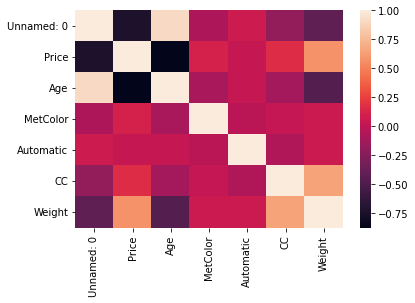

In [252]:
sns.heatmap(corr)

In [253]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.6:
            if columns[j]:
                columns[j] = False

In [262]:
df1 = df1.drop(['KM', 'FuelType', 'HP', 'Doors'], axis = 1)
df1

,Unnamed: 0,Price,Age,MetColor,Automatic,CC,Weight
0,0,13500,23.0,1.0,0,2000,1165
1,1,13750,23.0,1.0,0,2000,1165
2,2,13950,24.0,NaN,0,2000,1165
3,3,14950,26.0,0.0,0,2000,1165
4,4,13750,30.0,0.0,0,2000,1170
...,...,...,...,...,...,...,...
1431,1431,7500,NaN,1.0,0,1300,1025
1432,1432,10845,72.0,0.0,0,1300,1015
1433,1433,8500,NaN,0.0,0,1300,1015
1434,1434,7250,70.0,1.0,0,1300,1015


In [264]:
selected_columns = df1.columns[columns]
selected_columns.shape

(5,)

In [266]:
df1 = df1[selected_columns]
print(df1)

      Unnamed: 0  Price  MetColor  Automatic    CC
0              0  13500       1.0          0  2000
1              1  13750       1.0          0  2000
2              2  13950       NaN          0  2000
3              3  14950       0.0          0  2000
4              4  13750       0.0          0  2000
...          ...    ...       ...        ...   ...
1431        1431   7500       1.0          0  1300
1432        1432  10845       0.0          0  1300
1433        1433   8500       0.0          0  1300
1434        1434   7250       1.0          0  1300
1435        1435   6950       0.0          0  1600

[1436 rows x 5 columns]
